In [1258]:
import numpy as np 
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt
import seaborn as sns

# load the dataset

In [1259]:
de_train = pd.read_csv('train.csv')
de_test = pd.read_csv('test.csv')

de_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [1260]:
de_test.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [1261]:
de_train.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [1262]:
de_train = de_train.drop(['id'],axis=1)

In [1263]:
test_id = de_test['id'].copy(deep=False)
de_test = de_test.drop(['id'],axis=1)

As suggeted in a post on this dataset, the Name columns contain a lot of noise and we may want to drop it.

In [1264]:
de_train.drop(columns=['Name'], inplace=True)
de_test.drop(columns=['Name'], inplace=True)

# Visualize nulls in this dataset

In [1265]:
import missingno

<Axes: >

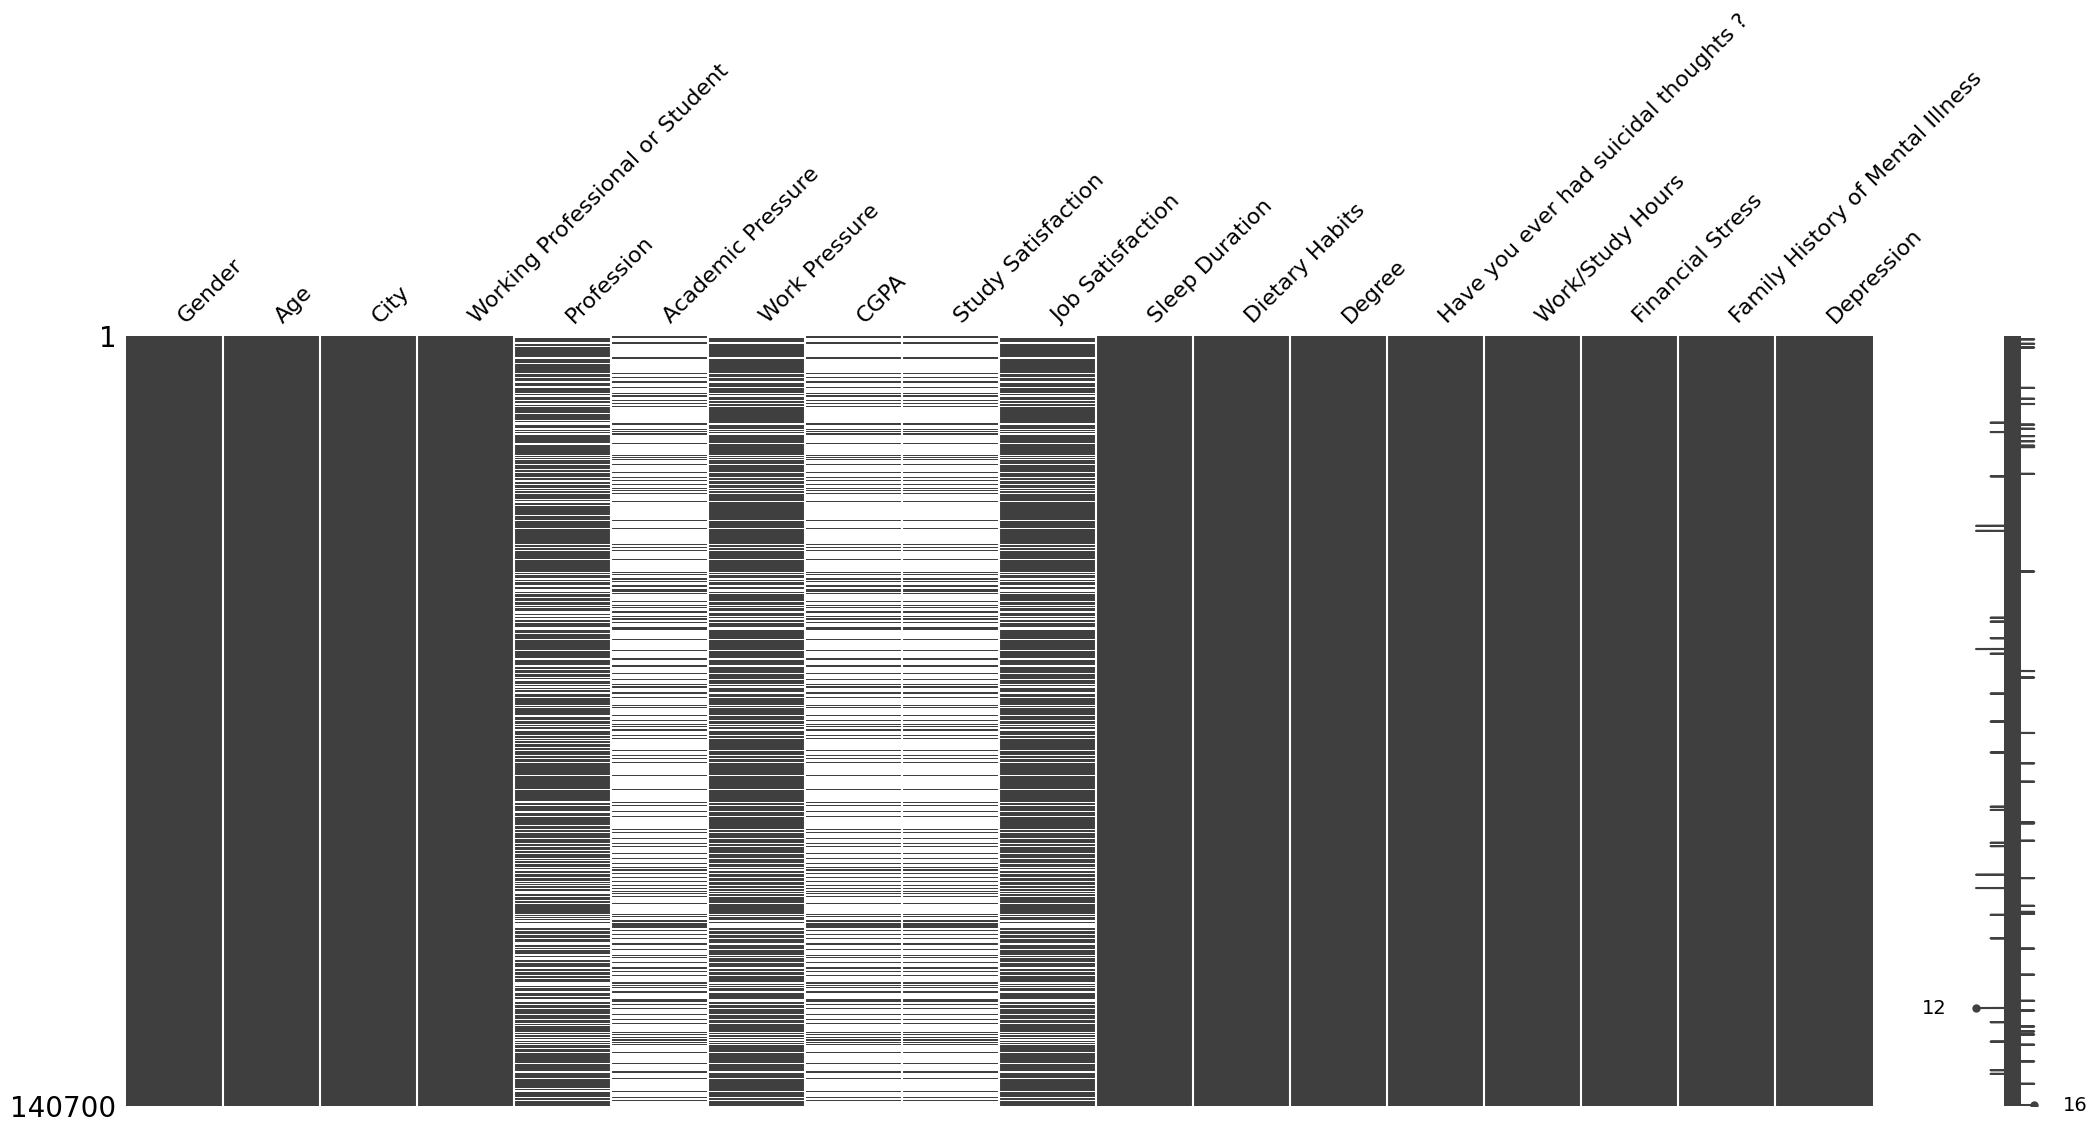

In [1266]:
missingno.matrix(de_train)

<Axes: >

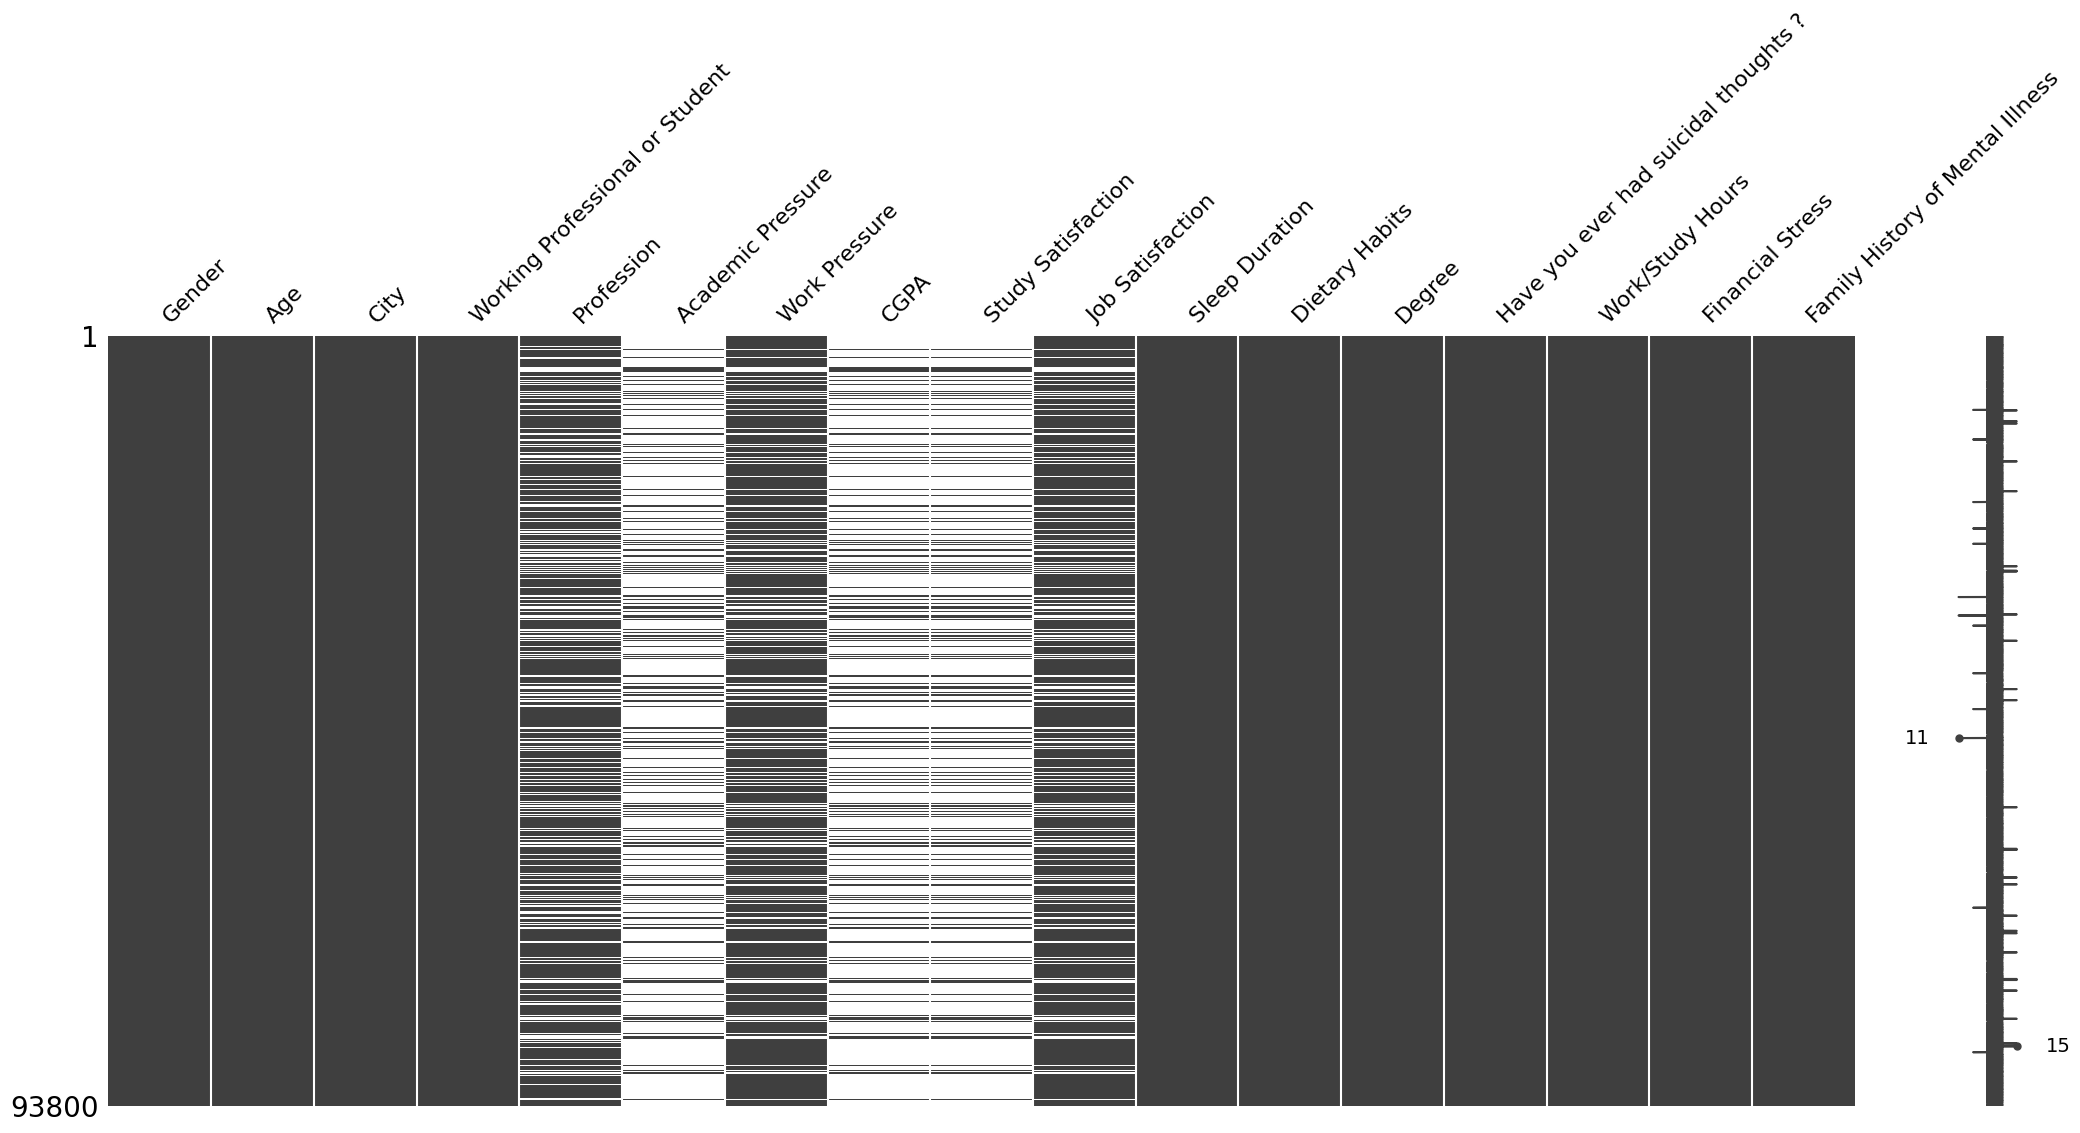

In [1267]:
missingno.matrix(de_test)

<Axes: >

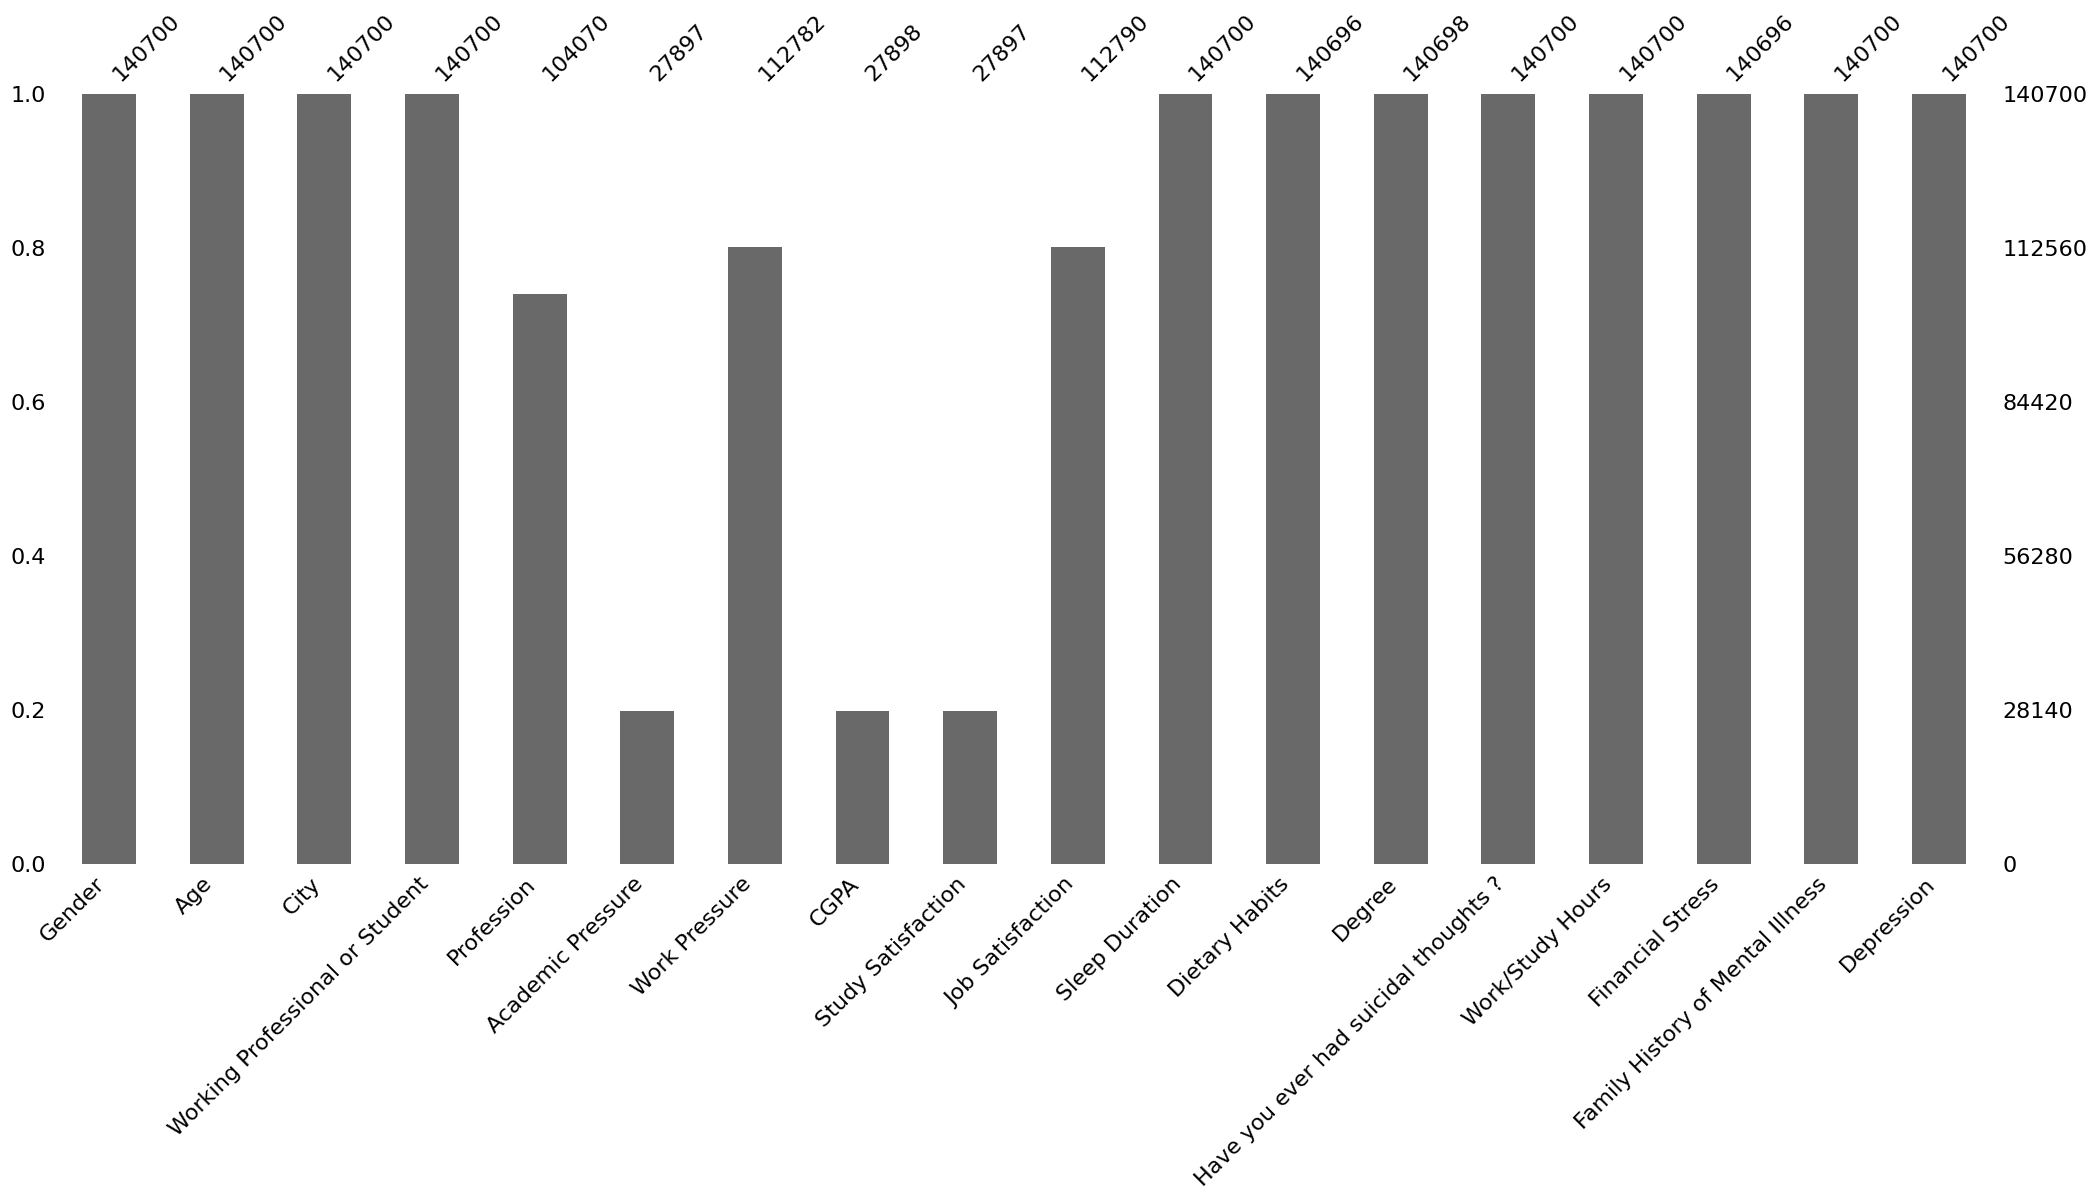

In [1268]:
missingno.bar(de_train)

<Axes: >

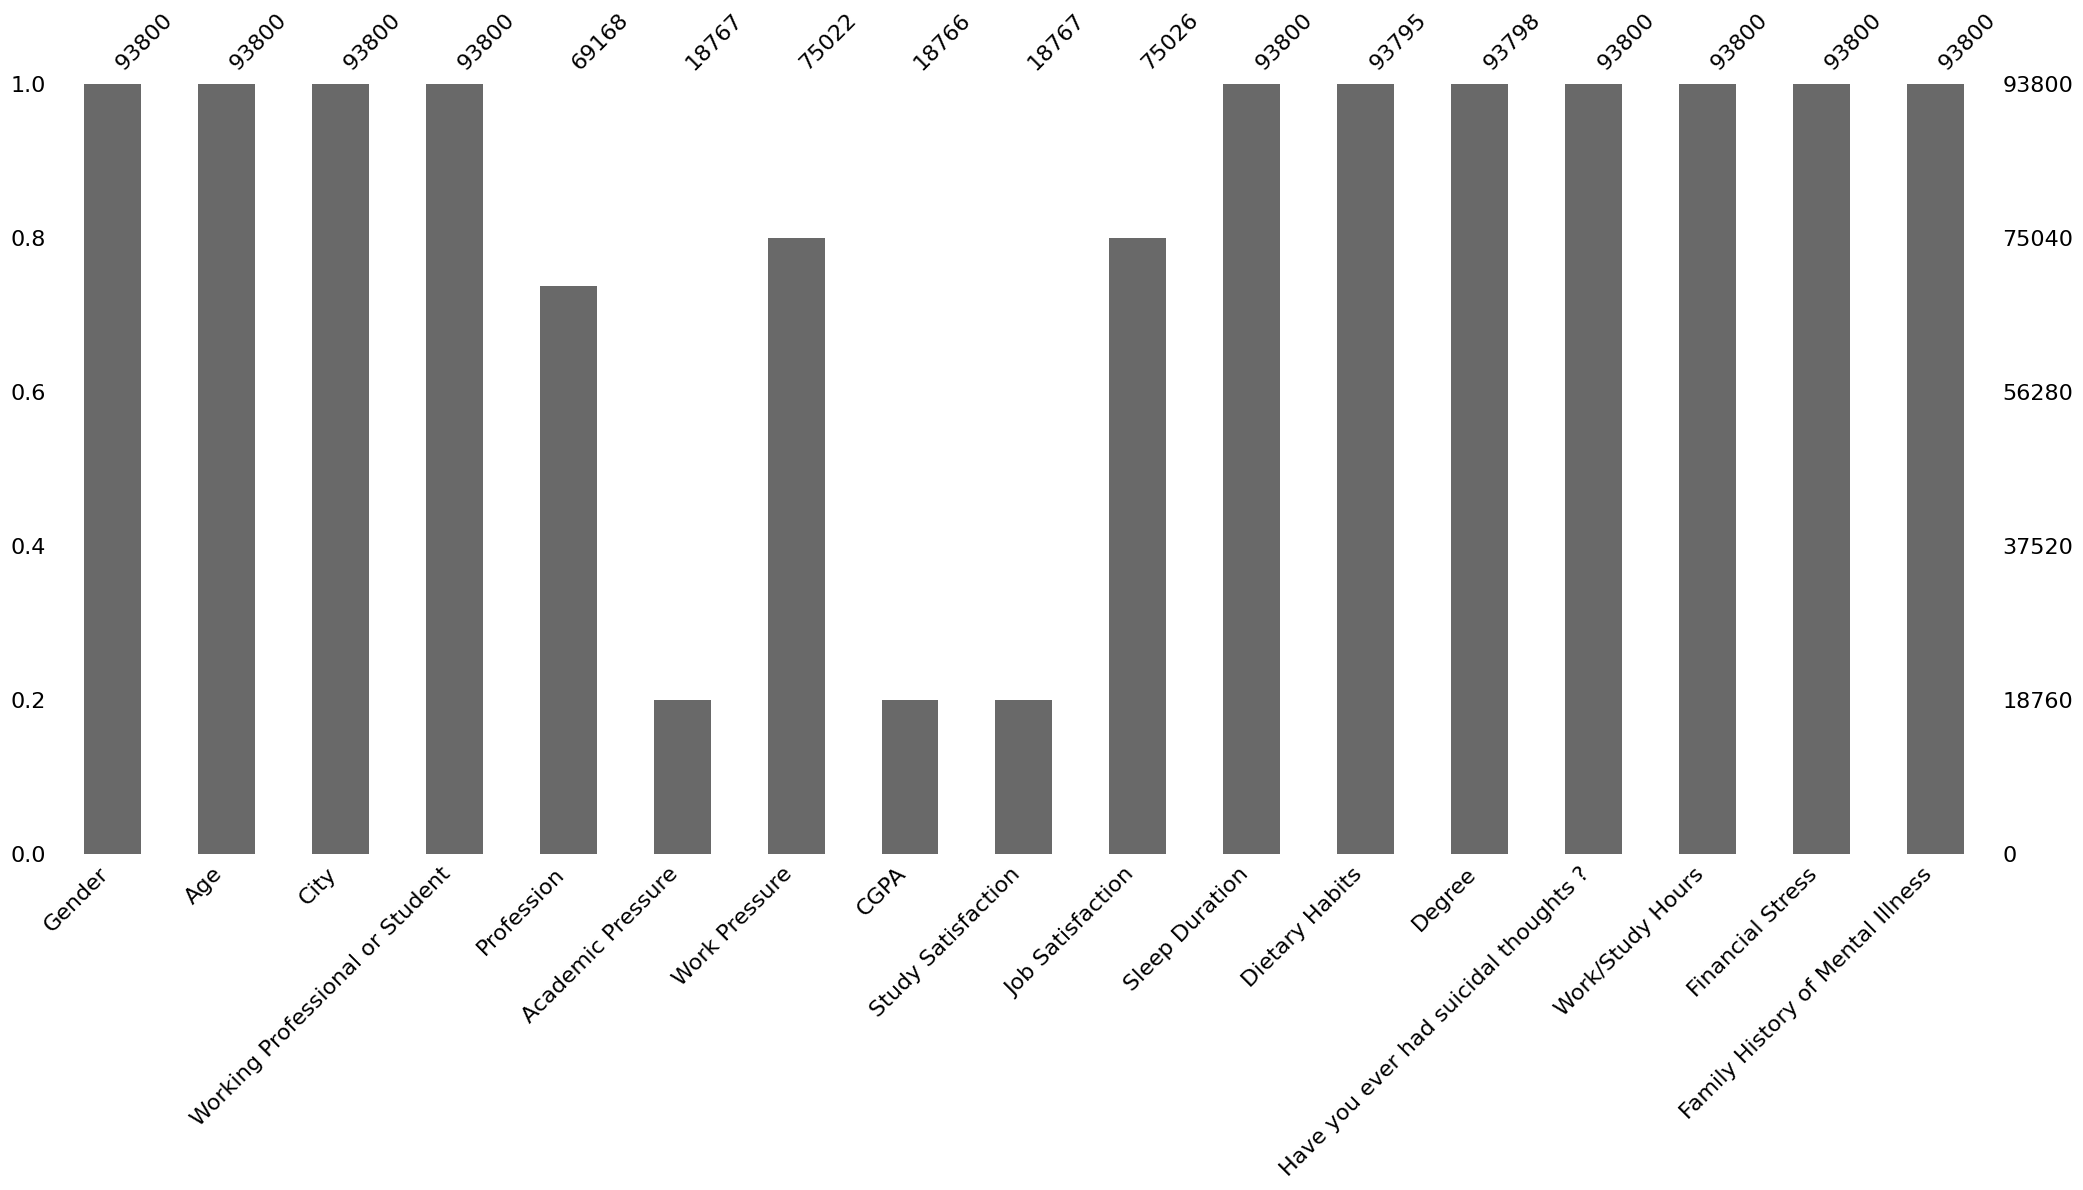

In [1269]:
missingno.bar(de_test)

<Axes: >

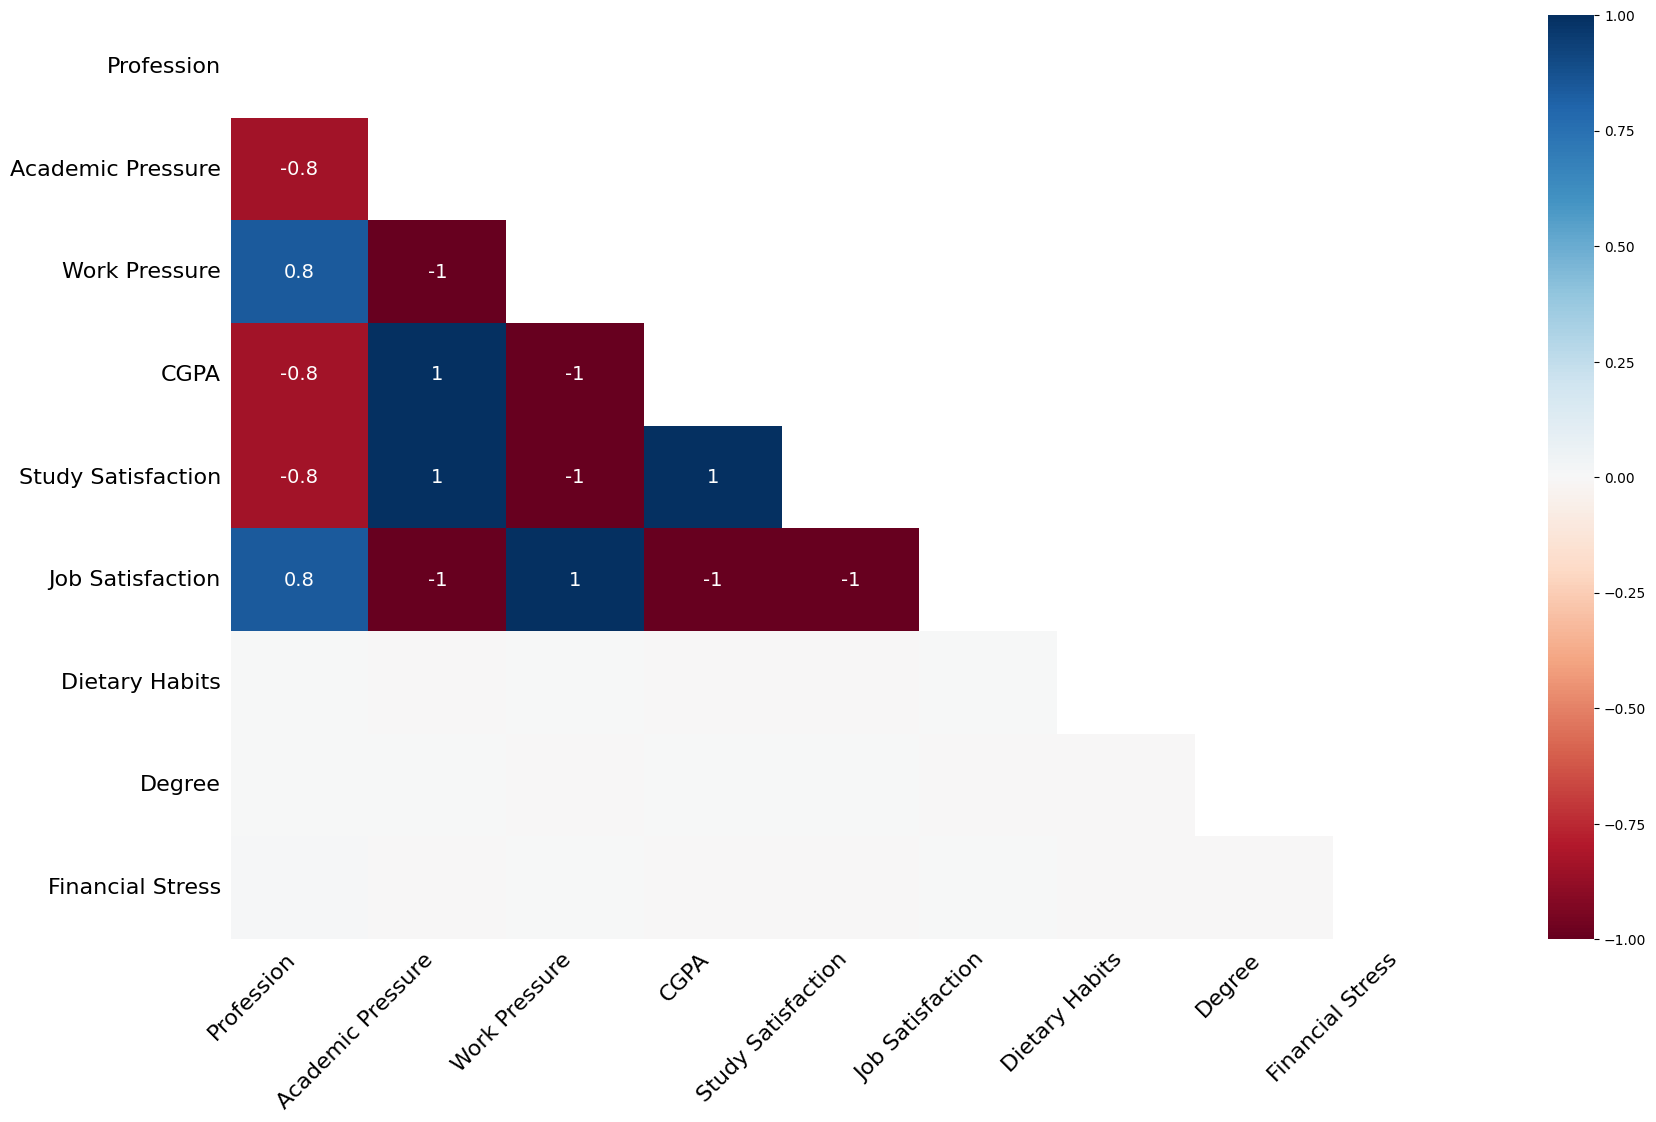

In [1270]:
missingno.heatmap(de_train)

It looks like except professions, nulls in other columns have a strong correlationof $\mid 1\mid$. This may be due to specific properties in Profession column. Let's take a closer look on distribution of this column. We can see the test has similar null correlations:

<Axes: >

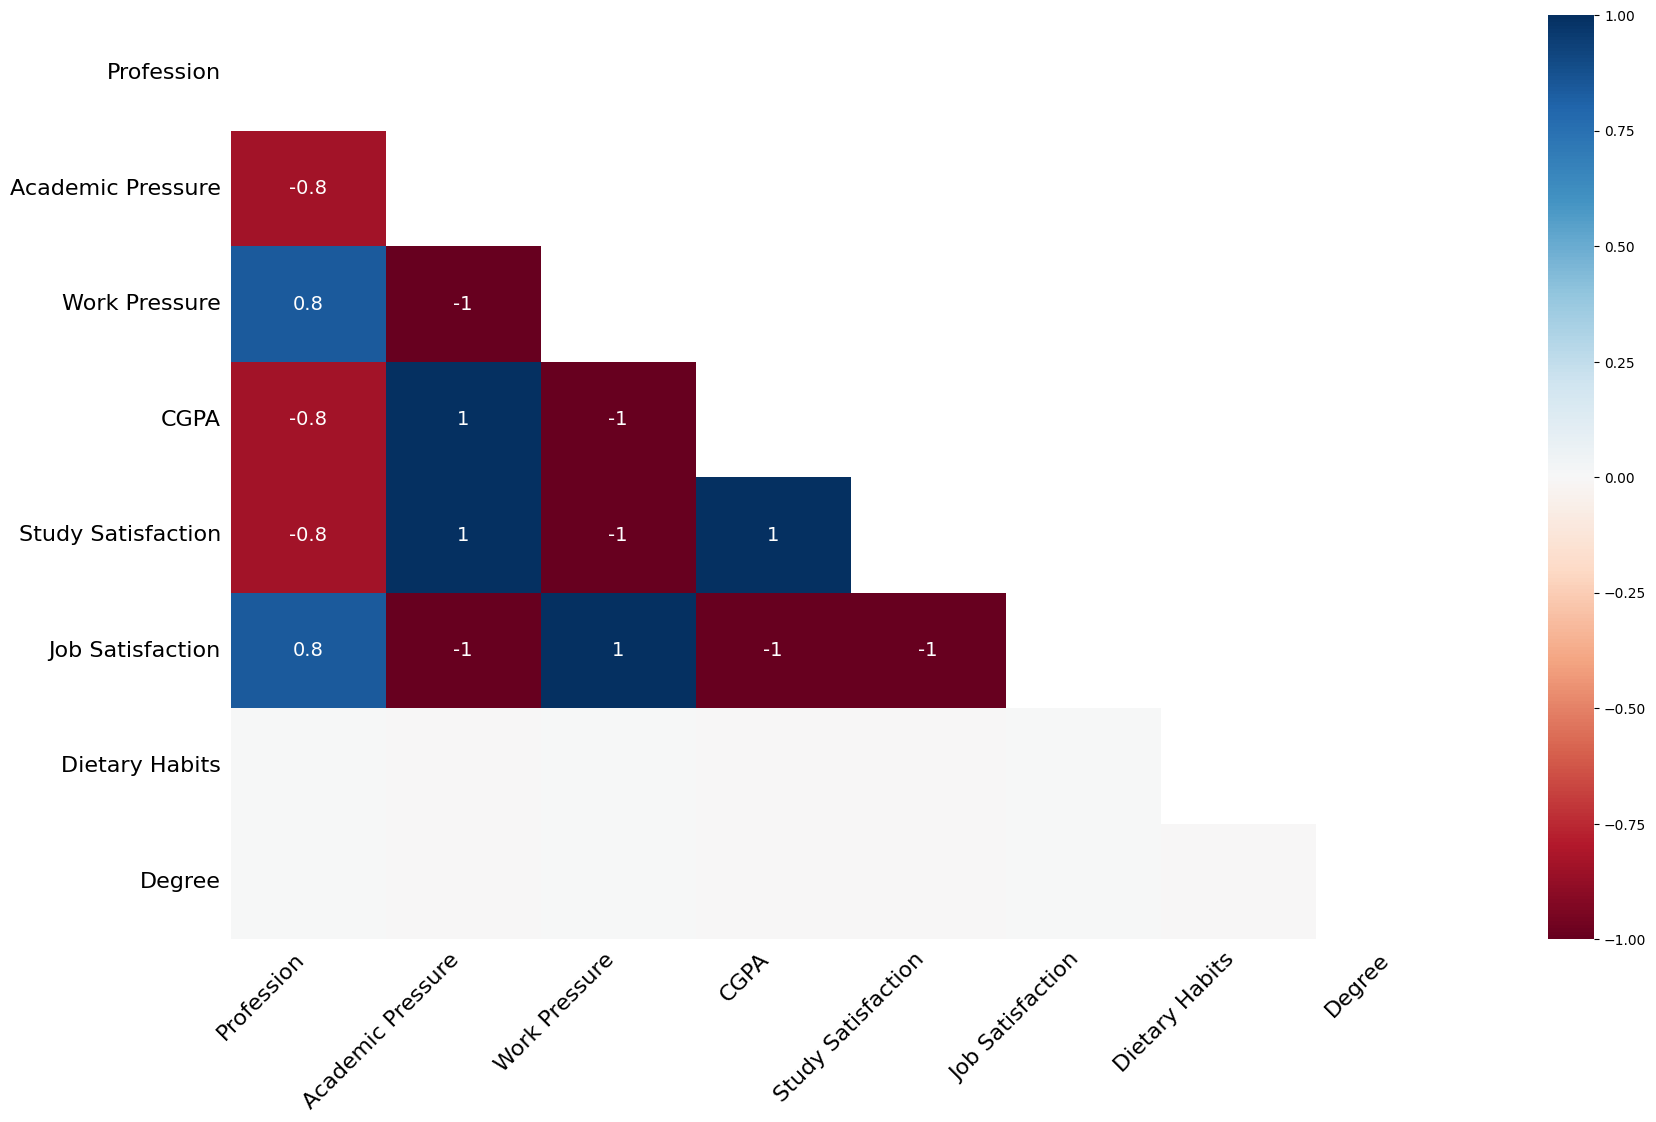

In [1271]:
missingno.heatmap(de_test)

## Gender columns

In [1272]:
de_train.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [1273]:
de_test.Gender.unique()

array(['Male', 'Female'], dtype=object)

<BarContainer object of 2 artists>

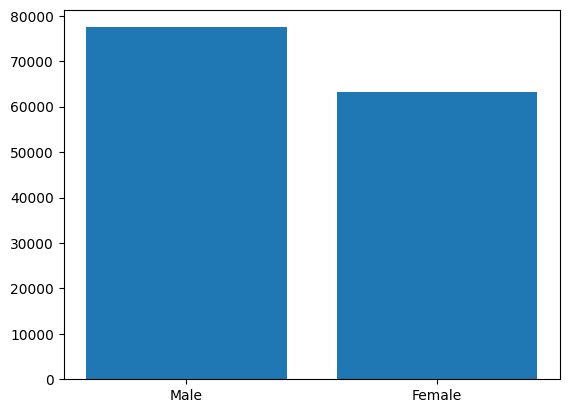

In [1274]:
gender_tr = de_train.Gender.value_counts()
plt.bar(gender_tr.index, gender_tr)

<BarContainer object of 2 artists>

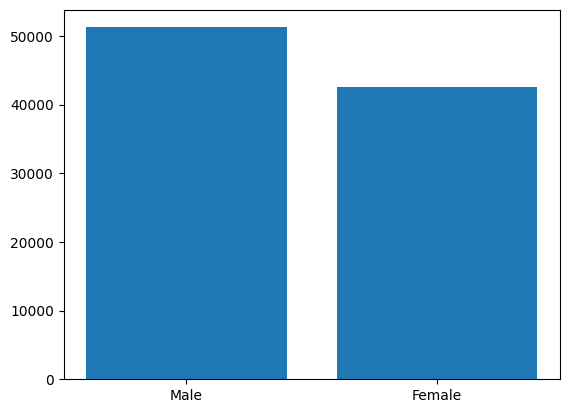

In [1275]:
gender_te = de_test.Gender.value_counts()
plt.bar(gender_te.index, gender_te)

We can be assured that train and test data have simmilar gender distribution. Now this columns is better to be in true and false.

In [1276]:
de_train.Gender = de_train.Gender.map({'Male':True, 'Female':False})
de_train = de_train.rename(columns={'Gender':'Is Male'})

In [1277]:
de_train.head(5)

,Is Male,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,False,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,True,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,True,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,True,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,False,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [1278]:
de_test.Gender = de_test.Gender.map({'Male':True, 'Female':False})
de_test = de_test.rename(columns={'Gender':'Is Male'})
de_test.head(5)

,Is Male,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,True,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,False,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,True,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,False,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,True,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [1279]:
male_tr = de_train['Is Male'].value_counts()
male_te = de_test['Is Male'].value_counts()
count_male = [male_te[0], male_tr[0]]
count_n = [de_test.shape[0], de_train.shape[0]]

proportions_ztest(count_male, count_n)

(-1.9348143555361752, 0.05301308083542559)

We can conclude that the distribution of proportionns of gender in train and test are the same

## Age

We are just going to check if all values in this column is numeric

In [1280]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(de_train.Age)

True

In [1281]:
is_numeric_dtype(de_test.Age)

True

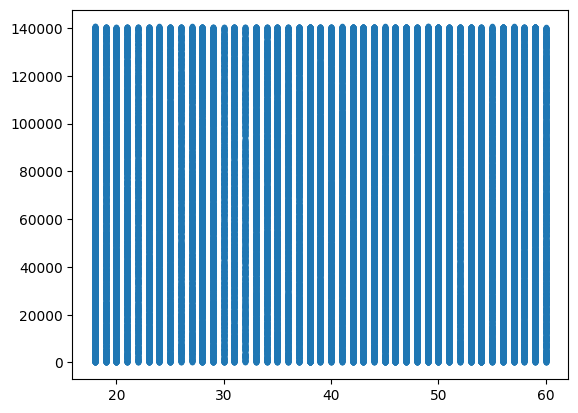

In [1282]:
plt.plot(de_train.Age, de_train.index, '.')

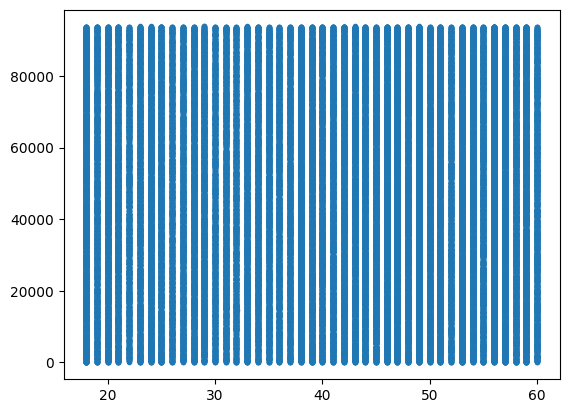

In [1283]:
plt.plot(de_test.Age, de_test.index, '.')

In conclusion, the distribution of Age in both sets are also similar: samples are about even in all ages

## City
The point here is to see if 
- it's just city names in this column
- the distribution of people with respect to cities

In [1284]:
de_train.City.unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

In [1285]:
de_test.City.unique()

array(['Visakhapatnam', 'Kolkata', 'Jaipur', 'Rajkot', 'Kalyan', 'Mumbai',
       'Surat', 'Srinagar', 'Delhi', 'Lucknow', 'Thane', 'Meerut',
       'Nagpur', 'Ghaziabad', 'Chennai', 'Varanasi', 'Indore', 'Pune',
       'Hyderabad', 'Kanpur', 'Nashik', 'Bhopal', 'Faridabad',
       'Bangalore', 'Vasai-Virar', 'Ludhiana', 'Patna', 'Vadodara',
       'Ahmedabad', 'Agra', 'Malyan', 'Pratyush', 'Vidya',
       'Less than 5 hours', 'Aditi', 'Keshav', 'Nalini', 'Mhopal', 'Avni',
       'Ira', 'Vaishnavi', 'Bhavna', 'Lawyer', 'Thani', 'Hrithik', 'City',
       'Unaly', 'Is Kanpur', 'Golkata', 'Less Delhi', 'Sara', 'Saurav',
       'Vikram', 'Parth', 'Siddhesh', 'Vaikot', 'Leela', 'Chemist',
       'San Vasai-Virar', 'No', 'More Delhi', 'Saanvi', 'Pratham',
       'Vidhi', 'Abhinav', 'Rolkata', 'Ghopal', 'No.12'], dtype=object)

So in conclusion, errorneous values in city columns from the train set:
- M.Tech
- Less Delhi
- M.Com
- City
- 3.0
- Less than 5 Kalyan
- MCA
- MSc
- No
- ME
- Researcher

Erroneous values in city columns from the test set:
- Less than 5 hours
- Lawyer
- City
- Less Delhi
- Is Kanpur
- No
- Chemist
- More Delhi
- No.12

In [1286]:
def train_non_loc_2loc_first_step(x):
    if x=='Less Delhi' or x=='More Delhi': return 'Delhi'
    elif x=='Less than 5 Kalyan': return 'Kalyan'
    elif x=='Is Kanpur': return 'Kanpur'
    else: return x
de_train.City = de_train.City.apply(train_non_loc_2loc_first_step)
de_train.City.unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna', 'Nandini',
       'M.Com', 'Plata', 'Atharv', 'Pratyush', 'City', '3.0', 'MCA',
       'Mira', 'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir',
       'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan',
       'Vaanya', 'Gaurav', 'Harsh', 'Reyansh', 'Kashish', 'Kibara',
       'Vaishnavi', 'Chhavi', 'Parth', 'Mahi', 'Tushar', 'MSc', 'No',
       'Rashi', 'ME', 'Molkata', 'Researcher', 'Kagan', 'Armaan', 'Ithal',
       'Nalyan',

Erroneous value list on city column from trian set:
- M.Tech
- ~~Less Delhi~~
- M.Com
- City
- 3.0
- ~~Less than 5 Kalyan~~
- MCA
- MSc
- No
- ME
- Researcher

In [1287]:
error_cities = ['M.Tech', 'M.Com', '3.0', 'MCA', 'MSc', 'No', 'ME', 'Researcher']

de_train[de_train.City.isin(error_cities)]

,Is Male,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
28672,True,29.0,M.Tech,Student,NaN,3.0,NaN,7.04,5.0,NaN,7-8 hours,Moderate,M.Tech,No,11.0,1.0,No,0
33276,True,56.0,M.Com,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,LLB,Yes,2.0,4.0,Yes,0
35309,False,21.0,3.0,Student,NaN,3.0,NaN,8.69,4.0,NaN,7-8 hours,Unhealthy,BCA,Yes,11.0,5.0,No,1
38232,False,59.0,MCA,Working Professional,Architect,NaN,1.0,NaN,NaN,3.0,7-8 hours,Healthy,B.Arch,No,3.0,2.0,No,0
82304,True,53.0,MSc,Working Professional,Architect,NaN,4.0,NaN,NaN,4.0,7-8 hours,Healthy,M.Tech,Yes,3.0,2.0,No,0
82472,False,45.0,No,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,More than 8 hours,Moderate,BSc,No,7.0,4.0,Yes,0
90669,True,25.0,MCA,Working Professional,HR Manager,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,B.Tech,Yes,11.0,5.0,Yes,1
93066,False,25.0,ME,Student,NaN,2.0,NaN,6.00,2.0,NaN,7-8 hours,Healthy,BHM,Yes,8.0,1.0,No,0
105684,True,56.0,Researcher,Working Professional,Researcher,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Healthy,ME,No,4.0,5.0,Yes,0
114378,False,26.0,M.Com,Student,NaN,4.0,NaN,8.95,1.0,NaN,Less than 5 hours,Unhealthy,MBA,Yes,2.0,5.0,No,1


It's very lucky that we don't have many of those people hence we only need to fill these with mode

In [1288]:
(de_train.City==de_train.City.mode()[0]).sum()

6592

In [1289]:
de_train.loc[de_train.City.isin(error_cities), 'City'] = de_train.City.mode()[0]


In [1290]:
de_train.City.unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'Bhavna', 'Nandini', 'Plata',
       'Atharv', 'Pratyush', 'City', 'Mira', 'Moreadhyay', 'Morena',
       'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi', 'Krinda',
       'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh',
       'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi',
       'Tushar', 'Rashi', 'Molkata', 'Kagan', 'Armaan', 'Ithal', 'Nalyan',
       'Dhruv', 'Galesabad', 'Itheg', 'Aaradhya', 'Pooja', 'Khushi',
       'Kh

In [1291]:
de_train[de_train.City=='City']

,Is Male,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
34300,False,28.0,City,Student,NaN,3.0,NaN,7.49,3.0,NaN,7-8 hours,Unhealthy,Class 12,No,6.0,2.0,No,1
50691,False,43.0,City,Working Professional,Entrepreneur,NaN,5.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,MSc,Yes,0.0,5.0,Yes,0
120908,False,29.0,City,Student,NaN,3.0,NaN,8.58,1.0,NaN,Less than 5 hours,Healthy,LLM,No,6.0,2.0,Yes,0


In [1292]:
de_train.loc[de_train.City=='City', 'City'] = de_train.City.mode()[0]

In [1293]:
de_train.City.unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'Bhavna', 'Nandini', 'Plata',
       'Atharv', 'Pratyush', 'Mira', 'Moreadhyay', 'Morena', 'Ishkarsh',
       'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi', 'Krinda', 'Ayansh',
       'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh',
       'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth', 'Mahi',
       'Tushar', 'Rashi', 'Molkata', 'Kagan', 'Armaan', 'Ithal', 'Nalyan',
       'Dhruv', 'Galesabad', 'Itheg', 'Aaradhya', 'Pooja', 'Khushi',
       'Khaziabad'

Cleaning on `de_train.City` is done! Now we are should work on `de_test.City`

Erroneous values in city columns from the test set:
- Less than 5 hours
- Lawyer
- City
- Less Delhi
- Is Kanpur
- No
- Chemist
- More Delhi
- No.12

In [1294]:
de_test.City = de_test.City.apply(train_non_loc_2loc_first_step)
de_test.City.unique()

array(['Visakhapatnam', 'Kolkata', 'Jaipur', 'Rajkot', 'Kalyan', 'Mumbai',
       'Surat', 'Srinagar', 'Delhi', 'Lucknow', 'Thane', 'Meerut',
       'Nagpur', 'Ghaziabad', 'Chennai', 'Varanasi', 'Indore', 'Pune',
       'Hyderabad', 'Kanpur', 'Nashik', 'Bhopal', 'Faridabad',
       'Bangalore', 'Vasai-Virar', 'Ludhiana', 'Patna', 'Vadodara',
       'Ahmedabad', 'Agra', 'Malyan', 'Pratyush', 'Vidya',
       'Less than 5 hours', 'Aditi', 'Keshav', 'Nalini', 'Mhopal', 'Avni',
       'Ira', 'Vaishnavi', 'Bhavna', 'Lawyer', 'Thani', 'Hrithik', 'City',
       'Unaly', 'Golkata', 'Sara', 'Saurav', 'Vikram', 'Parth',
       'Siddhesh', 'Vaikot', 'Leela', 'Chemist', 'San Vasai-Virar', 'No',
       'Saanvi', 'Pratham', 'Vidhi', 'Abhinav', 'Rolkata', 'Ghopal',
       'No.12'], dtype=object)

In [1295]:
error_cities = ['Less than 5 hours', 'Lawyer', 'City', 'Less Delhi', 'No', 'Chemist', 'No.12']

de_test[de_test.City.isin(error_cities)]

,Is Male,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
3010,True,20.0,Less than 5 hours,Student,NaN,1.0,NaN,9.63,4.0,NaN,5-6 hours,Moderate,Class 12,No,3.0,3.0,No
23873,True,41.0,Lawyer,Working Professional,Lawyer,NaN,3.0,NaN,NaN,1.0,7-8 hours,Healthy,LLM,No,7.0,4.0,No
29471,True,37.0,City,Working Professional,Mechanical Engineer,NaN,5.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BE,Yes,3.0,2.0,No
69226,True,33.0,City,Student,NaN,5.0,NaN,6.83,2.0,NaN,Less than 5 hours,Unhealthy,MBA,No,9.0,2.0,Yes
70403,False,56.0,Chemist,Working Professional,Chemist,NaN,4.0,NaN,NaN,5.0,Less than 5 hours,Healthy,MBBS,Yes,1.0,5.0,No
77960,True,31.0,No,Working Professional,HR Manager,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,PhD,No,11.0,5.0,No
92459,False,57.0,No.12,Working Professional,Customer Support,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,BA,No,8.0,4.0,Yes


In [1296]:
de_test.City.mode()[0]

'Kalyan'

In [1297]:
de_test.loc[de_test.City.isin(error_cities), 'City'] = de_test.City.mode()[0]

In [1298]:
de_test.City.unique()

array(['Visakhapatnam', 'Kolkata', 'Jaipur', 'Rajkot', 'Kalyan', 'Mumbai',
       'Surat', 'Srinagar', 'Delhi', 'Lucknow', 'Thane', 'Meerut',
       'Nagpur', 'Ghaziabad', 'Chennai', 'Varanasi', 'Indore', 'Pune',
       'Hyderabad', 'Kanpur', 'Nashik', 'Bhopal', 'Faridabad',
       'Bangalore', 'Vasai-Virar', 'Ludhiana', 'Patna', 'Vadodara',
       'Ahmedabad', 'Agra', 'Malyan', 'Pratyush', 'Vidya', 'Aditi',
       'Keshav', 'Nalini', 'Mhopal', 'Avni', 'Ira', 'Vaishnavi', 'Bhavna',
       'Thani', 'Hrithik', 'Unaly', 'Golkata', 'Sara', 'Saurav', 'Vikram',
       'Parth', 'Siddhesh', 'Vaikot', 'Leela', 'San Vasai-Virar',
       'Saanvi', 'Pratham', 'Vidhi', 'Abhinav', 'Rolkata', 'Ghopal'],
      dtype=object)

In [1299]:
(de_test.City=='San Vasai-Virar').sum()

1

In [1300]:
de_test.loc[de_test.City=='San Vasai-Virar', 'City'] = 'Vasai-Virar'

In [1301]:
de_test.City.unique()

array(['Visakhapatnam', 'Kolkata', 'Jaipur', 'Rajkot', 'Kalyan', 'Mumbai',
       'Surat', 'Srinagar', 'Delhi', 'Lucknow', 'Thane', 'Meerut',
       'Nagpur', 'Ghaziabad', 'Chennai', 'Varanasi', 'Indore', 'Pune',
       'Hyderabad', 'Kanpur', 'Nashik', 'Bhopal', 'Faridabad',
       'Bangalore', 'Vasai-Virar', 'Ludhiana', 'Patna', 'Vadodara',
       'Ahmedabad', 'Agra', 'Malyan', 'Pratyush', 'Vidya', 'Aditi',
       'Keshav', 'Nalini', 'Mhopal', 'Avni', 'Ira', 'Vaishnavi', 'Bhavna',
       'Thani', 'Hrithik', 'Unaly', 'Golkata', 'Sara', 'Saurav', 'Vikram',
       'Parth', 'Siddhesh', 'Vaikot', 'Leela', 'Saanvi', 'Pratham',
       'Vidhi', 'Abhinav', 'Rolkata', 'Ghopal'], dtype=object)

In [1302]:
test_city = de_test.City.unique()
train_city = de_train.City.unique()

list of values in test City but not in train City:

In [1303]:
in_test_not_train = test_city[~np.isin(test_city, train_city)]

In [1304]:
in_test_not_train

array(['Malyan', 'Aditi', 'Mhopal', 'Avni', 'Ira', 'Thani', 'Hrithik',
       'Unaly', 'Golkata', 'Sara', 'Saurav', 'Vikram', 'Siddhesh',
       'Vaikot', 'Leela', 'Pratham', 'Abhinav', 'Rolkata', 'Ghopal'],
      dtype=object)

list of values in train City but not in Test City

In [1305]:
in_train_not_test = train_city[~np.isin(train_city, test_city)]

In [1306]:
in_train_not_test

array(['Ishanabad', 'Ayush', 'Gurgaon', 'Krishna', 'Aishwarya', 'Harsha',
       'Aditya', 'Malyansh', 'Raghavendra', 'Nandini', 'Plata', 'Atharv',
       'Mira', 'Moreadhyay', 'Morena', 'Ishkarsh', 'Kashk', 'Mihir',
       'Tolkata', 'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kashish', 'Kibara', 'Chhavi',
       'Mahi', 'Tushar', 'Rashi', 'Molkata', 'Kagan', 'Armaan', 'Ithal',
       'Nalyan', 'Dhruv', 'Galesabad', 'Itheg', 'Aaradhya', 'Pooja',
       'Khushi', 'Khaziabad', 'Jhanvi', 'Unirar'], dtype=object)

In [1307]:
de_test[de_test.City.isin(in_test_not_train)].shape

(23, 17)

In [1308]:
de_train[de_train.City.isin(in_train_not_test)].shape

(64, 18)

For now we just map those values as others.

In [1309]:
de_train.loc[de_train.City.isin(in_train_not_test), 'City'] = 'Other'

In [1310]:
de_train.City.unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Other', 'Vidhi', 'Keshav', 'Nalini', 'Saanvi',
       'Bhavna', 'Pratyush', 'Vidya', 'Vaishnavi', 'Parth'], dtype=object)

In [1311]:
de_test.loc[de_test.City.isin(in_test_not_train), 'City'] = 'Other'
de_test.City.unique()

array(['Visakhapatnam', 'Kolkata', 'Jaipur', 'Rajkot', 'Kalyan', 'Mumbai',
       'Surat', 'Srinagar', 'Delhi', 'Lucknow', 'Thane', 'Meerut',
       'Nagpur', 'Ghaziabad', 'Chennai', 'Varanasi', 'Indore', 'Pune',
       'Hyderabad', 'Kanpur', 'Nashik', 'Bhopal', 'Faridabad',
       'Bangalore', 'Vasai-Virar', 'Ludhiana', 'Patna', 'Vadodara',
       'Ahmedabad', 'Agra', 'Other', 'Pratyush', 'Vidya', 'Keshav',
       'Nalini', 'Vaishnavi', 'Bhavna', 'Parth', 'Saanvi', 'Vidhi'],
      dtype=object)

Before we continue on, to make better comparisons of cities, we might need to shift cities with lower number of people to others

In [1312]:
small_sample_tr = de_train.City.value_counts()[de_train.City.value_counts()<=10].index
small_sample_te = de_test.City.value_counts()[de_test.City.value_counts()<=10].index

In [1313]:
np.setdiff1d(small_sample_tr, small_sample_te)

array([], dtype=object)

In [1314]:
de_train.loc[de_train.City.isin(small_sample_tr), 'City'] = 'Other'
de_test.loc[de_test.City.isin(small_sample_te), 'City'] = 'Other'

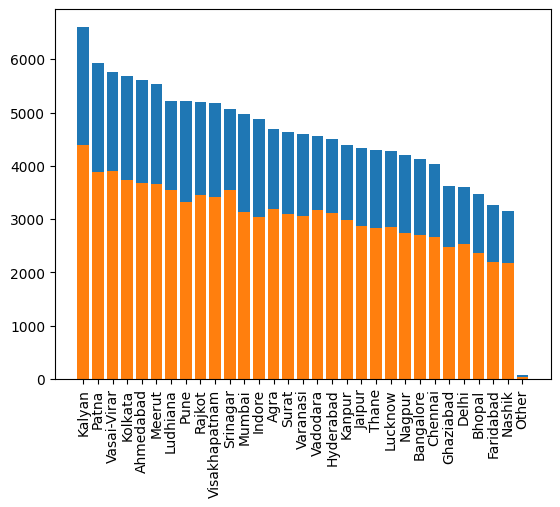

In [1315]:
count_citytr = de_train.City.value_counts()
count_cityte = de_test.City.value_counts()
count_cityte = count_cityte.loc[count_citytr.index]
plt.bar(count_citytr.index, count_citytr)
plt.bar(count_citytr.index, count_cityte)
_ = plt.xticks(rotation = 90)

In [1316]:
from scipy.stats import ks_2samp
ks_2samp(count_citytr, count_cityte)

KstestResult(statistic=0.7741935483870968, pvalue=2.1133055111933748e-09, statistic_location=3898, statistic_sign=-1)

p value is far less than 0.05 (or 0.01), then distributions of samples among cities are likely the same

Next question: are there any cities having more people in depression?

In [1317]:
city_vs_depression = de_train.groupby('City').Depression.value_counts().unstack()
city_vs_depression

Depression,0,1
City,,
Agra,3783,901
Ahmedabad,4390,1223
Bangalore,3399,724
Bhopal,2667,808
Chennai,3258,786
Delhi,2905,689
Faridabad,2788,480
Ghaziabad,2914,706
Hyderabad,3259,1237


<Axes: xlabel='City'>

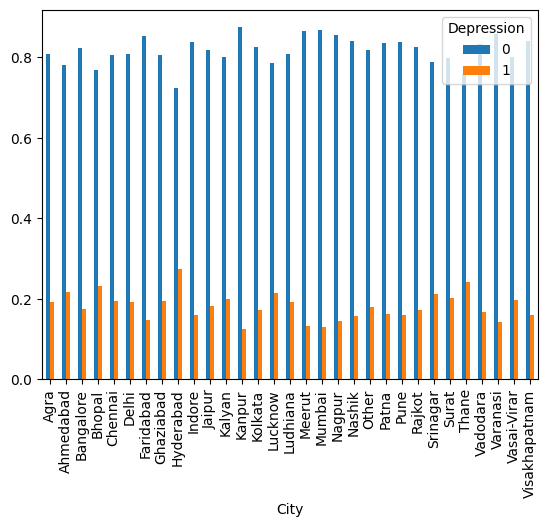

In [1318]:
city_vs_depression_p = de_train.groupby('City').Depression.value_counts(normalize=True).unstack()
city_vs_depression_p.plot(kind='bar')

In [1319]:
from scipy.stats import chi2_contingency
cities = city_vs_depression.index
n_cities = len(cities)
disim_matrix = [[0 for i in range(n_cities)] for i in range(n_cities)]

for i in range(0, n_cities):
    for j in range(i, n_cities):
        table = [
            city_vs_depression.loc[cities[i]],
            city_vs_depression.loc[cities[j]]
        ]
        _, p_val, _, _ = chi2_contingency(table)
        disim_matrix[i][j] = disim_matrix[j][i] = 1-p_val

C:\Users\Huawei\AppData\Local\Temp\ipykernel_31260\3839309783.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  city_Z = linkage(disim_matrix, method='ward')


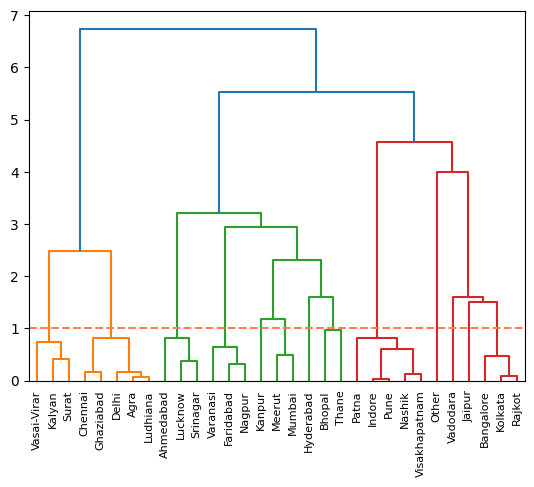

In [1320]:
from scipy.cluster.hierarchy import linkage, dendrogram

city_Z = linkage(disim_matrix, method='ward')

_ = dendrogram(city_Z, labels = cities)
_ = plt.xticks(rotation=90)
plt.axhline(y=1, color='coral', linestyle='--', label='Distance = 1')

In [1321]:
cities

Index(['Agra', 'Ahmedabad', 'Bangalore', 'Bhopal', 'Chennai', 'Delhi',
       'Faridabad', 'Ghaziabad', 'Hyderabad', 'Indore', 'Jaipur', 'Kalyan',
       'Kanpur', 'Kolkata', 'Lucknow', 'Ludhiana', 'Meerut', 'Mumbai',
       'Nagpur', 'Nashik', 'Other', 'Patna', 'Pune', 'Rajkot', 'Srinagar',
       'Surat', 'Thane', 'Vadodara', 'Varanasi', 'Vasai-Virar',
       'Visakhapatnam'],
      dtype='object', name='City')

We can see some cities are drastically different from the others (and distance between them and other clusters are greater or close to 1):
1. Kanpur
2. Bhopal
3. Thane
4. Other
5. Vadodara
6. Jaipur

In [1322]:
de_train['In Kanpur'] = de_train.City=='Kanpur'
de_train['In Bhopal'] = de_train.City=='Bhopal'
de_train['In Thane'] = de_train.City=='Thane'
de_train['In Other Cities'] = de_train.City=='Other'
de_train['In Vadodara'] = de_train.City=='Vadodara'
de_train['In Jaipur'] = de_train.City=='Jaipur'
de_train = de_train.drop(columns='City', axis=1)

In [1323]:
de_train.columns

Index(['Is Male', 'Age', 'Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'In Kanpur', 'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara',
       'In Jaipur'],
      dtype='object')

In [1324]:
de_test['In Kanpur'] = de_test.City=='Kanpur'
de_test['In Bhopal'] = de_test.City=='Bhopal'
de_test['In Thane'] = de_test.City=='Thane'
de_test['In Other Cities'] = de_test.City=='Other'
de_test['In Vadodara'] = de_test.City=='Vadodara'
de_test['In Jaipur'] = de_test.City=='Jaipur'
de_test = de_test.drop(columns='City', axis=1)

In [1325]:
depression = de_train.pop('Depression')

de_train.insert(de_train.shape[1],'Depression', depression)
de_train.columns

Index(['Is Male', 'Age', 'Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur',
       'Depression'],
      dtype='object')

## Working professional or student

In [1326]:
de_train['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

In [1327]:
de_test['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

Glad that those two columns don't have value errors. 

In [1328]:
count_str = de_train['Working Professional or Student'].value_counts()
count_ste = de_test['Working Professional or Student'].value_counts()

In [1329]:
count_str

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [1330]:
count_ste

Working Professional or Student
Working Professional    75028
Student                 18772
Name: count, dtype: int64

In [1331]:
count_student = [count_str[1], count_ste[1]]
n_both = [de_train.shape[0], de_test.shape[0]]

proportions_ztest(count_student, n_both)

(-1.085293114997997, 0.277791854315769)

In [1332]:
table = [
    [count_str[0], count_str[1]],
    [count_ste[0], count_ste[1]]
]
chi2_contingency(table)

Chi2ContingencyResult(statistic=1.1664312165014334, pvalue=0.28013574465668495, dof=1, expected_freq=array([[112696.2,  28003.8],
       [ 75130.8,  18669.2]]))

We can conclude that train and test have similar distributions on this column as p value is large

It's tempting at this moment to see if student and working professionals have the same distribution on depression counts

In [1333]:
# split working_tr and student_tr by 'working professional or studnet' column
working_tr = de_train[de_train['Working Professional or Student']=='Working Professional']
student_tr = de_train[de_train['Working Professional or Student']=='Student']

In [1334]:
count_depress_working_tr = working_tr['Depression'].value_counts()
count_depress_student_tr = student_tr['Depression'].value_counts()


In [1335]:
count_depress_student_tr

Depression
1    16336
0    11565
Name: count, dtype: int64

In [1336]:
count_depress_working_tr

Depression
0    103568
1      9231
Name: count, dtype: int64

There's no need to use test to tell if the distributions are different, but still use it at the best:

In [1337]:
table_depress = [
    [count_depress_student_tr[0], count_depress_student_tr[1]],
    [count_depress_working_tr[0], count_depress_working_tr[1]]
]

chi2_contingency(table_depress)

Chi2ContingencyResult(statistic=38157.58582778027, pvalue=0.0, dof=1, expected_freq=array([[22831.02937456,  5069.97062544],
       [92301.97062544, 20497.02937456]]))

It's clear that student and non-students have different depression distribution

In [1338]:
working_tr = working_tr.drop(columns= ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Working Professional or Student'],
                             axis=1)
working_tr.rename(columns={'Work/Study Hours':'Work Hours'}, inplace=True)
working_tr.columns

Index(['Is Male', 'Age', 'Profession', 'Work Pressure', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur',
       'Depression'],
      dtype='object')

In [1339]:
student_tr = student_tr.drop(columns = ['Profession', 'Work Pressure', 'Job Satisfaction', 'Working Professional or Student'], axis=1)
student_tr.rename(columns={'Work/Study Hours':'Study Hours'}, inplace=True)
student_tr.columns

Index(['Is Male', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur',
       'Depression'],
      dtype='object')

And do the same thing on test set

In [1340]:
working_te = de_test[de_test['Working Professional or Student']=='Working Professional']
student_te = de_test[de_test['Working Professional or Student']=='Student']

In [1341]:
working_te = working_te.drop(columns= ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Working Professional or Student'],
                             axis=1)
working_te.rename(columns={'Work/Study Hours':'Work Hours'}, inplace=True)
working_te.columns

Index(['Is Male', 'Age', 'Profession', 'Work Pressure', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur'],
      dtype='object')

In [1342]:
student_te = student_te.drop(columns = ['Profession', 'Work Pressure', 'Job Satisfaction', 'Working Professional or Student'], axis=1)
student_te.rename(columns={'Work/Study Hours':'Study Hours'}, inplace=True)
student_te.columns

Index(['Is Male', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur'],
      dtype='object')

### Working Professional: Profession

In [1343]:
working_tr.Profession.unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer', nan,
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

Error values in Profession:
1. nan
2. 'B.Com', 
3. 'BE', 
4. 'Student', 
5. 'Yogesh', 
6. 'Dev',
7. 'MBA', 
8. 'LLM', 
9. 'BCA', 
10. 'Academic', 
11. 'Profession'
12. 'BBA'
13. 'Working Professional'
14. 'MBBS'
15. 'Patna', 
16. 'Unveil', 
17. 'B.Ed', 
18. 'Nagpur', 
19. 'Moderate', 
20. 'M.Ed',
21. 'Analyst', 
22. 'Pranav', 
23. 'Visakhapatnam', 
24. 'PhD', 
25. 'Yuvraj'

Several questions:
1. Does nan mean unemployed? Can they have similar distributions of data?
2. What about other error values? Are they also unemployed or random?

In [1344]:
unemployed = working_tr[working_tr.Profession=='Unemployed']

In [1345]:
unemployed

,Is Male,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,In Kanpur,In Bhopal,In Thane,In Other Cities,In Vadodara,In Jaipur,Depression
322,True,58.0,Unemployed,1.0,5.0,5-6 hours,Unhealthy,B.Pharm,No,4.0,3.0,Yes,False,False,False,False,False,False,0
78938,True,21.0,Unemployed,1.0,4.0,7-8 hours,Unhealthy,BBA,Yes,5.0,5.0,Yes,False,False,False,False,False,False,1
115614,False,37.0,Unemployed,3.0,4.0,Less than 5 hours,Moderate,MSc,Yes,10.0,4.0,Yes,False,False,False,False,False,False,0


In [1346]:
unemployed

,Is Male,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,In Kanpur,In Bhopal,In Thane,In Other Cities,In Vadodara,In Jaipur,Depression
322,True,58.0,Unemployed,1.0,5.0,5-6 hours,Unhealthy,B.Pharm,No,4.0,3.0,Yes,False,False,False,False,False,False,0
78938,True,21.0,Unemployed,1.0,4.0,7-8 hours,Unhealthy,BBA,Yes,5.0,5.0,Yes,False,False,False,False,False,False,1
115614,False,37.0,Unemployed,3.0,4.0,Less than 5 hours,Moderate,MSc,Yes,10.0,4.0,Yes,False,False,False,False,False,False,0


In [1347]:
unfilled = working_tr[working_tr.Profession.isnull()]

In [1348]:
unemployed['Work Hours']

322        4.0
78938      5.0
115614    10.0
Name: Work Hours, dtype: float64

In [1349]:
unfilled['Work Hours']

29         5.0
36         0.0
43        10.0
48         1.0
50         8.0
          ... 
140647    11.0
140655     0.0
140666     2.0
140667    12.0
140695     2.0
Name: Work Hours, Length: 8763, dtype: float64

In [1350]:
ks_2samp(unemployed['Work Hours'], unfilled['Work Hours'])

KstestResult(statistic=0.275476435010841, pvalue=0.93830298059998, statistic_location=3.0, statistic_sign=-1)

In [1351]:
unfilled.columns

Index(['Is Male', 'Age', 'Profession', 'Work Pressure', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur',
       'Depression'],
      dtype='object')

In [1352]:
unfilled.Age.describe()

count    8763.000000
mean       29.885884
std        13.751520
min        18.000000
25%        18.000000
50%        20.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

In [1353]:
error_value = ['Yogesh', 'Dev', 'Profession','Working Professional', 'Patna', 'Unveil',  'Nagpur', 'Moderate', 
                'Pranav', 'Visakhapatnam',  'Yuvraj']
error_profession = working_tr[working_tr.Profession.isin(error_value)]
student_value = ['B.Com', 'BE', 'Student', 'MBA', 'LLM', 'BCA', 'Academic',
                'BBA', 'MBBS', 'B.Ed', 'M.Ed','PhD']
student_profession = working_tr[working_tr.Profession.isin(student_value)]

<Axes: >

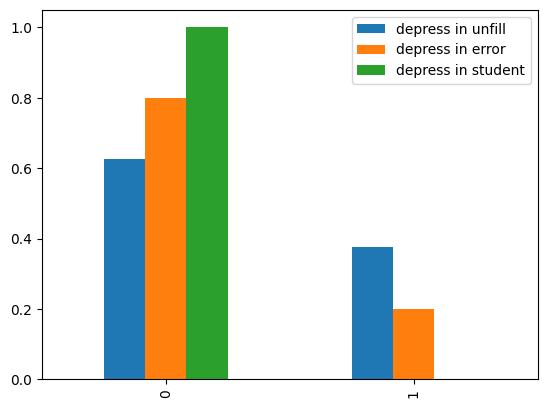

In [1354]:
prop_unfill = unfilled.Depression.value_counts(normalize=True)
prop_error = error_profession.Depression.value_counts(normalize=True)
prop_student = student_profession.Depression.value_counts(normalize=True)
prop_student[1] = 0
compare = pd.DataFrame({'depress in unfill':prop_unfill.values, 'depress in error':prop_error.values, 
                        'depress in student':prop_student.values})
compare.plot(kind='bar')

In [1355]:
working_tr.loc[error_profession.index, 'Profession'] = 'Unemployed'
working_tr.loc[student_profession.index, 'Profession'] = 'Unemployed'
working_tr.Profession.fillna('Unemployed', inplace=True)
working_tr.Profession.unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer', 'Unemployed',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker',
       'Family Consultant', 'FamilyVirar', 'City Manager',
       'Medical Doctor', 'Analyst'], dtype=object)

The p value is large, and we can conclude that Researchers, Chemist and Data Scientist have similar depression distribution

In [1356]:
working_tr.loc[working_tr.Profession=='Medical Doctor', 'Profession'] = 'Doctor'
working_tr.loc[working_tr.Profession=='Family Consultant', 'Profession'] = 'Consultant'
working_tr.loc[working_tr.Profession=='FamilyVirar', 'Profession'] = 'Unemployed'
working_tr.loc[working_tr.Profession=='City Manager', 'Profession'] = 'Manager'

working_tr.loc[working_tr.Profession=='Travel Consultant', 'Profession'] = 'Consultant'
working_tr.loc[working_tr.Profession=='Finanancial Analyst', 'Profession'] = 'Financial Analyst'

In [1357]:
working_tr.loc[working_tr.Profession=='Analyst', 'Profession'] = 'Business Analyst'

In [1358]:
profession_count = working_tr.Profession.value_counts()
profession_count

Profession
Teacher                   24900
Unemployed                 8806
Content Writer             7812
Consultant                 6090
Architect                  4362
HR Manager                 4022
Pharmacist                 3891
Doctor                     3254
Business Analyst           3162
Chemist                    2967
Entrepreneur               2967
Financial Analyst          2903
Chef                       2860
Educational Consultant     2851
Data Scientist             2390
Researcher                 2328
Lawyer                     2211
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Software Engineer          1510
Civil Engineer             1469
UX/UI Designer             1451
Digital Marketer           1369
Accountant                 1339
Mechanical Engineer        11

In [1359]:
depression_vs_profession = working_tr.groupby("Profession").Depression.value_counts(normalize=True).unstack()

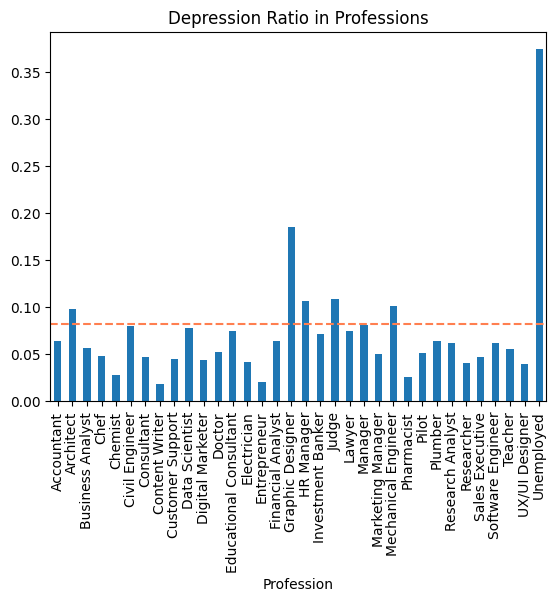

In [1360]:
p_depressed = working_tr.Depression.value_counts(normalize=True)[1]
depression_vs_profession[1].plot(kind='bar')
plt.title('Depression Ratio in Professions')
plt.axhline(y=p, color='coral', linestyle='--')

In [1361]:
depression_vs_profession = working_tr.groupby("Profession").Depression.value_counts().unstack()
jobs = depression_vs_profession.index
matrix = [[0 for i in range(len(jobs))] for i in range(len(jobs))]
for i in range(0, len(jobs)):
    for j in range(0, len(jobs)):
        table = [
            depression_vs_profession.loc[jobs[i]].values,
            depression_vs_profession.loc[jobs[j]].values
        ]
        _, p_val, _, _ = chi2_contingency(table)
        matrix[i][j] = 1-p_val
        matrix[j][i] = 1-p_val

C:\Users\Huawei\AppData\Local\Temp\ipykernel_31260\3984027323.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, method='ward')


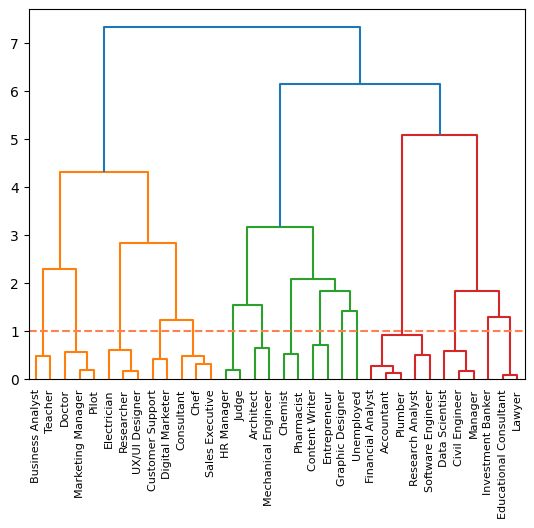

In [1362]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(matrix, method='ward')
_ = dendrogram(Z, labels=jobs, leaf_rotation=90)
plt.axhline(y=1, color='coral', linestyle='--', label='Distance = 1')

It's very obvious that Grphic Designer and Unemployed are drastically different from other occupations in terms of depression distribution, thus, we should divide it into:

1. Graphic Designer
2. Unemployed
3. Investment Banker
4. Other (non-specified)

In [1363]:
working_tr['Is Graphic Designer'] = working_tr.Profession=='Graphic Designer'
working_tr['Unemployed'] = working_tr.Profession=='Unemployed'
working_tr['Is Banker'] = working_tr.Profession=='Investment Banker'
working_tr.drop(columns=['Profession'], axis=1, inplace=True)

In [1364]:
working_te.Profession.unique()

array(['Judge', 'Educational Consultant', 'Teacher', 'Customer Support',
       nan, 'Chemist', 'Content Writer', 'Consultant', 'HR Manager',
       'Research Analyst', 'Digital Marketer', 'Electrician',
       'Marketing Manager', 'Plumber', 'Pharmacist', 'Lawyer', 'Pilot',
       'Architect', 'Chef', 'Graphic Designer', 'Entrepreneur', 'Manager',
       'Mechanical Engineer', 'Software Engineer', 'Travel Consultant',
       'Finanancial Analyst', 'Financial Analyst', 'Doctor',
       'Business Analyst', 'UX/UI Designer', 'Sales Executive',
       'Data Scientist', 'Accountant', 'Researcher', 'Civil Engineer',
       'Investment Banker', 'Unhealthy', 'B.Ed', 'Student',
       'Working Professional', 'ME', 'B.Pharm', '24th', 'Manvi', 'Yogesh',
       'Samar', 'Surat', 'PhD', 'M.Ed', 'MD', 'Name', 'MCA', 'Simran',
       'Analyst', 'Profession', 'Unemployed', 'BBA', 'LLM', 'Surgeon',
       'No', 'Unveil', 'City Consultant', 'M.Pharm'], dtype=object)

In [1365]:
working_te.loc[working_te.Profession=='Surgeon', 'Profession'] = 'Doctor'

In [1366]:
might_be_unemployed = ['B.Ed', 'Student', 'Working Professional', 'ME', 'B.Pharm', '24th', 'Manvi', 'Yogesh',
                       'Samar', 'Surat', 'PhD', 'M.Ed', 'MD', 'Name', 'MCA', 'Simran','Profession', 'Unhealthy',
                       'BBA', 'LLM', 'No', 'Unveil', 'M.Pharm']
working_te.loc[working_te.Profession.isin(might_be_unemployed), 'Profession'] = 'Unemployed'

In [1367]:
working_te.Profession.fillna('Unemployed', inplace=True)

In [1368]:
working_te['Is Graphic Designer'] = working_te.Profession=='Graphic Designer'
working_te['Unemployed'] = working_te.Profession=='Unemployed'
working_te['Is Banker'] = working_te.Profession=='Investment Banker'
working_te.drop(columns=['Profession'], axis=1, inplace=True)

In [1369]:
depression = working_tr.pop('Depression')
working_tr.insert(working_tr.shape[1], "Depression", depression)
working_tr.head(1)

,Is Male,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,...,In Kanpur,In Bhopal,In Thane,In Other Cities,In Vadodara,In Jaipur,Is Graphic Designer,Unemployed,Is Banker,Depression
0,False,49.0,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,...,False,False,False,False,False,False,False,False,False,0


### Working Professional: Work Pressure, work hours and job satisfaction

We should consider that if work pressure relate to work hours

In [1370]:
working_tr[working_tr['Work Pressure'].isnull()]

,Is Male,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,...,In Kanpur,In Bhopal,In Thane,In Other Cities,In Vadodara,In Jaipur,Is Graphic Designer,Unemployed,Is Banker,Depression
15846,True,53.0,NaN,5.0,More than 8 hours,Unhealthy,Class 12,No,12.0,1.0,...,False,False,False,False,False,False,False,True,False,0
18752,False,18.0,NaN,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,...,False,False,False,False,False,False,False,True,False,1
34694,False,46.0,NaN,NaN,5-6 hours,Moderate,Class 12,Yes,12.0,3.0,...,False,False,False,False,False,False,False,True,False,0
35612,True,27.0,NaN,NaN,Less than 5 hours,Unhealthy,B.Pharm,No,11.0,3.0,...,False,False,False,False,True,False,False,True,False,1
41915,True,18.0,NaN,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,...,False,False,False,False,False,False,False,True,False,1
55827,False,19.0,NaN,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,...,False,False,False,False,False,False,False,True,False,1
57196,False,20.0,NaN,NaN,Less than 5 hours,Moderate,Class 12,No,0.0,4.0,...,False,False,False,False,False,False,False,True,False,1
60348,True,29.0,NaN,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,...,False,False,False,False,False,False,False,True,False,0
76104,False,20.0,NaN,1.0,7-8 hours,Moderate,Class 12,No,11.0,1.0,...,False,False,False,False,False,False,False,True,False,1
85126,False,27.0,NaN,5.0,5-6 hours,Healthy,BE,Yes,10.0,5.0,...,True,False,False,False,False,False,False,False,False,1


<Axes: >

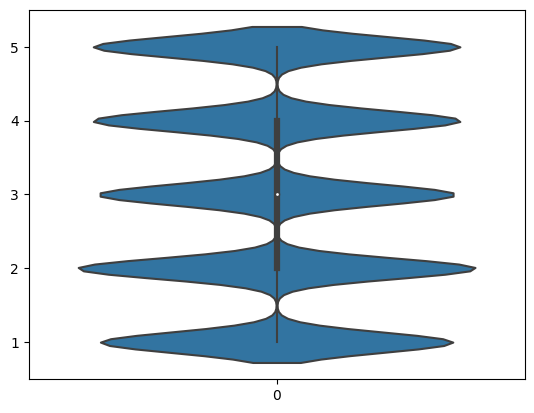

In [1371]:
sns.violinplot(working_tr['Work Pressure'])

In [1372]:
import math

mean_pressure = math.ceil(working_tr['Work Pressure'].mean())
working_tr['Work Pressure'].fillna(mean_pressure, inplace=True)

In [1373]:
pressure_vs_depression

Depression,0,1
Work Pressure,,
1.0,21077,485
2.0,23585,787
3.0,20718,1201
4.0,20153,2359
5.0,18035,4399


In [1374]:
pressure_vs_depression = working_tr.groupby('Work Pressure').Depression.value_counts().unstack()
pressure_level = pressure_vs_depression.index
for i in range(0, 4):
    for j in range(i+1, 5):
       table = [
        pressure_vs_depression.loc[pressure_level[i]],
        pressure_vs_depression.loc[pressure_level[j]]
       ]
       _, p_val, _, _ = chi2_contingency(table)
       print("pressure: {}, {}, p_val: {}".format(pressure_level[i], pressure_level[j], p_val))

pressure: 1.0, 2.0, p_val: 2.041135741084229e-10
pressure: 1.0, 3.0, p_val: 6.064824995722762e-68
pressure: 1.0, 4.0, p_val: 2.1660408828755794e-270
pressure: 1.0, 5.0, p_val: 0.0
pressure: 2.0, 3.0, p_val: 1.1808365650526578e-32
pressure: 2.0, 4.0, p_val: 1.9848555570731e-215
pressure: 2.0, 5.0, p_val: 0.0
pressure: 3.0, 4.0, p_val: 9.428831378063087e-84
pressure: 3.0, 5.0, p_val: 0.0
pressure: 4.0, 5.0, p_val: 2.6596801151348627e-161


We can conclude that the distribution of each pressure levels are distinct, making it a good predictor on depression

In [1375]:
#fill null to test data
mean_pressure = math.ceil(working_te['Work Pressure'].mean())
working_te['Work Pressure'].fillna(mean_pressure, inplace=True)

In [1376]:
working_tr['Work Hours'].isnull().sum()

0

In [1377]:
working_tr['Work Hours'].describe()

count    112799.000000
mean          6.028998
std           3.856315
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: Work Hours, dtype: float64

In [1378]:
depression_vs_work_hr = working_tr.groupby('Work Hours').Depression.value_counts(normalize=True).unstack()

<Axes: xlabel='Work Hours'>

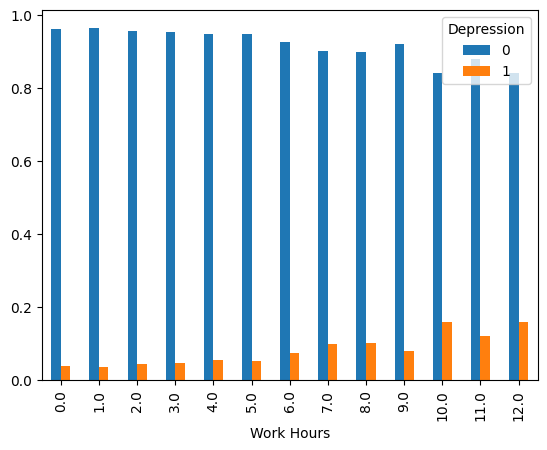

In [1379]:
depression_vs_work_hr.plot(kind='bar')

C:\Users\Huawei\AppData\Local\Temp\ipykernel_31260\4022561369.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_matrix = linkage(disim_matrix, method='ward')


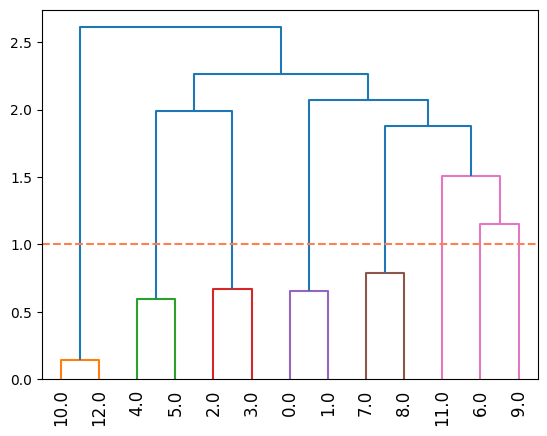

In [1380]:
depression_vs_work_hr = working_tr.groupby('Work Hours').Depression.value_counts().unstack()
hours = depression_vs_work_hr.index
n = 13
disim_matrix = [[0 for i in range(n)] for j in range(n)]

for i in range(0, n):
    for j in range(i, n):
        table = [
            depression_vs_work_hr.loc[hours[i]],
            depression_vs_work_hr.loc[hours[j]]
        ]
        _, p_val, _, _ = chi2_contingency(table)
        disim_matrix[i][j] = disim_matrix[j][i] = 1-p_val 

link_matrix = linkage(disim_matrix, method='ward')
_ = dendrogram(link_matrix, labels=hours, leaf_rotation=90)
plt.axhline(y=1, color='coral', linestyle='--')

In [1381]:
working_tr['Heavy_overtime'] = working_tr['Work Hours']>9
working_te['Heavy_overtime'] = working_te['Work Hours']>9

In [1382]:
overtime_table = working_tr.groupby('Heavy_overtime').Depression.value_counts().unstack()
chi2_contingency(overtime_table)

Chi2ContingencyResult(statistic=2011.0272551843693, pvalue=0.0, dof=1, expected_freq=array([[77729.02398071,  6927.97601929],
       [25838.97601929,  2303.02398071]]))

In [1383]:
working_tr['Job Satisfaction'].isnull().sum()

17

In [1384]:
working_tr['Job Satisfaction'].describe()

count    112782.000000
mean          2.974446
std           1.416088
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Job Satisfaction, dtype: float64

In [1385]:
m = working_tr['Job Satisfaction'].mode()[0]
working_tr['Job Satisfaction'].fillna(m, inplace=True)

<Axes: xlabel='Job Satisfaction'>

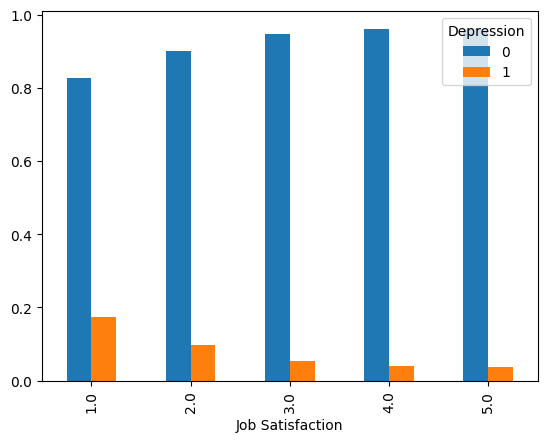

In [1386]:
working_tr.groupby('Job Satisfaction').Depression.value_counts(normalize=True).unstack().plot(kind='bar')

C:\Users\Huawei\AppData\Local\Temp\ipykernel_31260\2870341535.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_matrix = linkage(disim_matrix, method='ward')


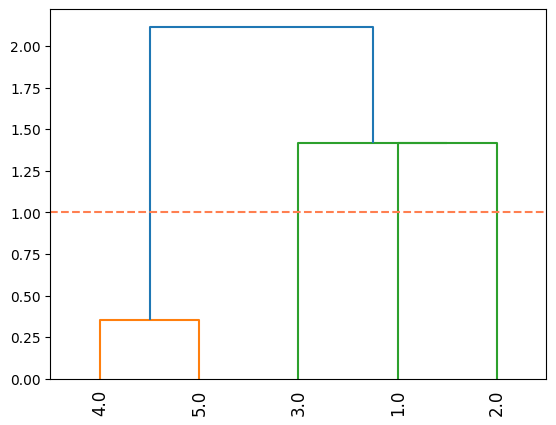

In [1387]:
depression_vs_js = working_tr.groupby('Job Satisfaction').Depression.value_counts().unstack()
hours = depression_vs_js.index
n = 5
disim_matrix = [[0 for i in range(n)] for j in range(n)]

for i in range(0, n):
    for j in range(i, n):
        table = [
            depression_vs_js.loc[hours[i]],
            depression_vs_js.loc[hours[j]]
        ]
        _, p_val, _, _ = chi2_contingency(table)
        disim_matrix[i][j] = disim_matrix[j][i] = 1-p_val 

link_matrix = linkage(disim_matrix, method='ward')
_ = dendrogram(link_matrix, labels=hours, leaf_rotation=90)
plt.axhline(y=1, color='coral', linestyle='--')

In [1404]:
working_tr.loc[working_tr['Job Satisfaction']==5, 'Job Satisfaction'] = 4

In [1388]:
working_te['Job Satisfaction'].describe()

count    75019.000000
mean         2.960957
std          1.410687
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Job Satisfaction, dtype: float64

In [1389]:
m = working_te['Job Satisfaction'].mode()
working_te['Job Satisfaction'].fillna(m, inplace=True)

In [1406]:
working_te.loc[working_te['Job Satisfaction']==5, 'Job Satisfaction'] = 4

In [1390]:
working_tr.columns

Index(['Is Male', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work Hours', 'Financial Stress', 'Family History of Mental Illness',
       'In Kanpur', 'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara',
       'In Jaipur', 'Is Graphic Designer', 'Unemployed', 'Is Banker',
       'Depression', 'Heavy_overtime'],
      dtype='object')

### Working Professionals: Sleep Duration

In [1391]:
working_tr['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    30474
7-8 hours            29623
More than 8 hours    26682
5-6 hours            25959
3-4 hours               10
4-5 hours                6
4-6 hours                5
No                       4
6-8 hours                4
6-7 hours                4
1-6 hours                4
2-3 hours                3
Unhealthy                2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Pune                     1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
1-3 hours                1
49 hours                 1
10-6 hours               1
35-36 hours              1
45                       1
Indore                   1
9-6 hours                1
9-5 hours                1
Name: count, dtype: int64

In [1392]:
normalized = ['Less than 5 hours','5-6 hours', '7-8 hours', 'More than 8 hours']

working_tr[working_tr['Sleep Duration'].isin(normalized)].groupby('Sleep Duration').Depression.value_counts(normalize=True).unstack()

Depression,0,1
Sleep Duration,,
5-6 hours,0.930467,0.069533
7-8 hours,0.924991,0.075009
Less than 5 hours,0.877272,0.122728
More than 8 hours,0.945244,0.054756


In [1393]:
working_tr[~working_tr['Sleep Duration'].isin(normalized)].Depression.value_counts(normalize=True)

Depression
0    0.95082
1    0.04918
Name: proportion, dtype: float64

<Axes: xlabel='Sleep Duration', ylabel='Age'>

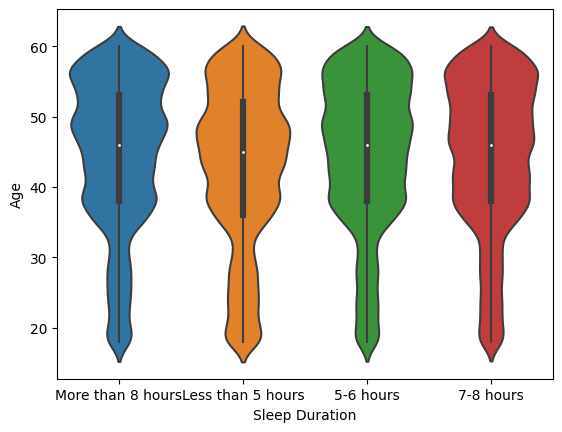

In [1394]:
normal_sleep = working_tr[working_tr['Sleep Duration'].isin(normalized)]
sns.violinplot(x='Sleep Duration', y = 'Age', data=normal_sleep)

In [1395]:
working_tr.loc[~working_tr['Sleep Duration'].isin(normalized), 'Sleep Duration'] = 'Other'

In [1396]:
working_tr['Unhealthy Sleep'] = working_tr['Sleep Duration'].isin(['Less than 5 hours'])

In [1397]:
sleep_table = working_tr.groupby('Unhealthy Sleep').Depression.value_counts().unstack()

In [1398]:
chi2_contingency(sleep_table)

Chi2ContingencyResult(statistic=928.4568235941731, pvalue=6.393742071287173e-204, dof=1, expected_freq=array([[75587.86514065,  6737.13485935],
       [27980.13485935,  2493.86514065]]))

In [1399]:
sleep_table

Depression,0,1
Unhealthy Sleep,,
False,76834,5491
True,26734,3740


In [1400]:
working_tr.drop(columns='Sleep Duration', axis=1, inplace=True)
working_tr.columns

Index(['Is Male', 'Age', 'Work Pressure', 'Job Satisfaction', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur',
       'Is Graphic Designer', 'Unemployed', 'Is Banker', 'Depression',
       'Heavy_overtime', 'Unhealthy Sleep'],
      dtype='object')

In [1402]:
working_te['Unhealthy Sleep']= working_te['Sleep Duration']=='Less than 5 hours'
working_te.drop(columns='Sleep Duration', axis=1, inplace=True)
working_te.columns

Index(['Is Male', 'Age', 'Work Pressure', 'Job Satisfaction', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'In Kanpur',
       'In Bhopal', 'In Thane', 'In Other Cities', 'In Vadodara', 'In Jaipur',
       'Is Graphic Designer', 'Unemployed', 'Is Banker', 'Heavy_overtime',
       'Unhealthy Sleep'],
      dtype='object')

### Working Profession: Dietary Habits

In [1408]:
working_tr['Dietary Habits'].value_counts()

Dietary Habits
Moderate        39784
Healthy         37090
Unhealthy       35910
More Healthy        2
No                  2
Yes                 1
Pratham             1
BSc                 1
Gender              1
Hormonal            1
Electrician         1
Vegas               1
Indoor              1
Class 12            1
Name: count, dtype: int64

In [1409]:
working_tr['Dietary Habits'].isnull().sum()

2

In [1410]:
diet_mode = working_tr['Dietary Habits'].mode()[0]
working_tr['Dietary Habits'].fillna(diet_mode,inplace=True)

normalized = ['Moderate', 'Healthy', 'Unhealthy']
working_tr.loc[~working_tr['Dietary Habits'].isin(normalized), 'Dietary Habits'] = diet_mode

C:\Users\Huawei\AppData\Local\Temp\ipykernel_31260\738057291.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_matrix = linkage(disim_matrix, method='ward')


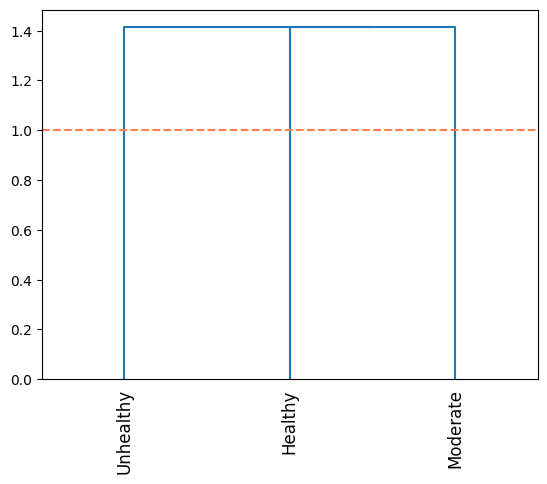

In [1414]:
depression_vs_diet = working_tr.groupby('Dietary Habits').Depression.value_counts().unstack()
diet = depression_vs_diet.index
n = len(diet)
disim_matrix = [[0 for i in range(n)] for j in range(n)]

for i in range(0, n):
    for j in range(i, n):
        table = [
            depression_vs_diet.loc[diet[i]],
            depression_vs_diet.loc[diet[j]]
        ]
        _, p_val, _, _ = chi2_contingency(table)
        disim_matrix[i][j] = disim_matrix[j][i] = 1-p_val 

link_matrix = linkage(disim_matrix, method='ward')
_ = dendrogram(link_matrix, labels=diet, leaf_rotation=90)
plt.axhline(y=1, color='coral', linestyle='--')

In [1416]:
working_tr['Dietary Habits'] = working_tr['Dietary Habits'].astype('category')

In [1418]:
working_te['Dietary Habits'].value_counts()

Dietary Habits
Moderate        26435
Healthy         24694
Unhealthy       23878
No                  4
More Healthy        2
Educational         1
1.0                 1
Raghav              1
Vivaan              1
5 Unhealthy         1
Soham               1
MCA                 1
Academic            1
Resistant           1
Less Healthy        1
Prachi              1
Indoor              1
Kolkata             1
Name: count, dtype: int64

In [1419]:
diet_mode = working_te['Dietary Habits'].mode()[0]
working_te.loc[~working_te['Dietary Habits'].isin(normalized), 'Dietary Habits'] = diet_mode
working_te['Dietary Habits'] = working_te['Dietary Habits'].astype('category')
working_te['Dietary Habits'].value_counts()

Dietary Habits
Moderate     26456
Healthy      24694
Unhealthy    23878
Name: count, dtype: int64